# Figure generation Scanorama

In [1]:
import sys
print(sys.executable)
print(sys.version)
print(sys.version_info)

/hpc/hers_basak/bin/miniconda3/envs/sc2_seurat/bin/python
3.9.9 | packaged by conda-forge | (main, Dec 20 2021, 02:40:17) 
[GCC 9.4.0]
sys.version_info(major=3, minor=9, micro=9, releaselevel='final', serial=0)


In [2]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))#embed HTML within IPython notebook and make containers 90% of screen
import numpy as np
import pandas as pd
import anndata as ad
import scanpy as sc
import seaborn as sns
import os
import matplotlib.pyplot as plt
import torch

%matplotlib inline
sc.settings.verbosity = 0             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.settings.set_figure_params(dpi=80, facecolor='white') #figure resolution and background color

# This is used
# os.path.join('data/'+object_names[i][6:10]+'_preprocessed.h5ad')
#sc.logging.print_versions()

In [3]:
#set data path
os.chdir('/home/hers_basak/jjiang/jack/outputs/deliverables/5_integration/data/scanorama/')
sc.settings.figdir = '/home/hers_basak/jjiang/jack/outputs/deliverables/5_integration/figures/'
#To make reproducible plots
np.random.seed(41)

In [4]:
files=['/home/hers_basak/jjiang/jack/outputs/deliverables/5_integration/data/scanorama/adata_n30_scanorama.h5ad']
names=['complete']
object_names_merged=list()
numberobj = len(files)

for i in range(numberobj):
    object_names_merged.append("adata"+"_"+names[i])
    locals()[object_names_merged[i]] = sc.read(files[i]) 
    print(object_names_merged[i],' is loaded')

adata_complete  is loaded


In [5]:
adata_complete

AnnData object with n_obs × n_vars = 522220 × 4000
    obs: 'species', 'gender', 'age', 'instrument', 'technology', 'atlas', 'sample', 'batch_1', 'doublet_score', 'predicted_doublet', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'n_genes', 'total_counts_mito', 'total_counts_norm', 'original_Library', 'original_Brain_Region', 'original_Level_1_cell_type', 'original_Level_2_cell_type', 'original_cellclass_lvl1', 'original_subclass_lvl3_1', 'original_cellclass_lvl1_n', 'original_lineage', 'original_subclass_lvl2', 'original_celltype_lvl3', 'donor', 'original_supercluster_term', 'original_cluster_id', 'original_subcluster_id', 'original_celltype', 'cell_type_lvl1', 'cell_type_lvl2', 'cell_type_lvl3', 'leiden'
    obsm: 'X_pca', 'X_pca_harmony', 'X_scanorama', 'X_umap'

In [6]:
atlases=['altena','agarwal','siletti','smajic','wang','welch']
for i in atlases:
    print(len(adata_complete.obs_names[adata_complete.obs['atlas']==i]))

85044
9214
287523
29495
43477
67467


Setup the anndata in order to create the figure

In [7]:
sc.tl.pca(adata_complete, svd_solver='arpack')

In [8]:
sc.pp.neighbors(adata_complete, n_pcs=50,n_neighbors=30,use_rep='X_scanorama')

sc.tl.umap(adata_complete)
#sc.tl.leiden(adata_complete)

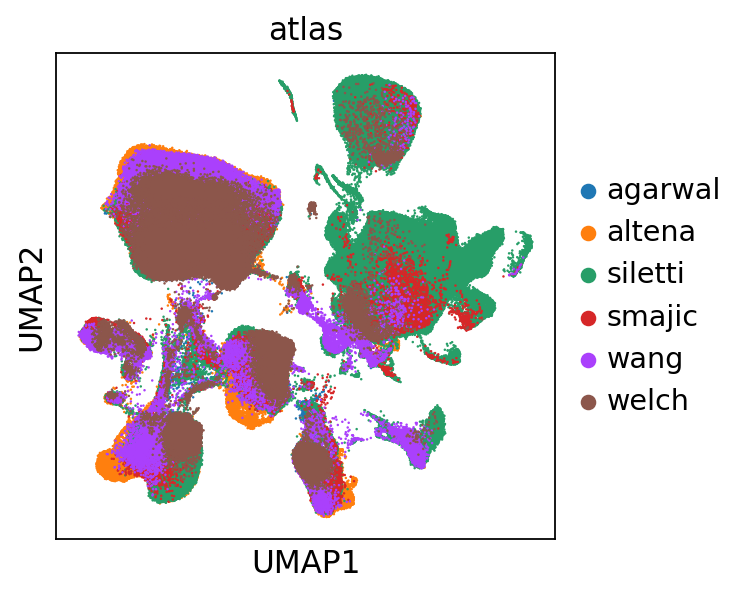

In [9]:
sc.pl.umap(adata_complete, color=['atlas'], 
               use_raw=False, s=5, wspace=0.5,save='adata_complete_scanorama_all.png')

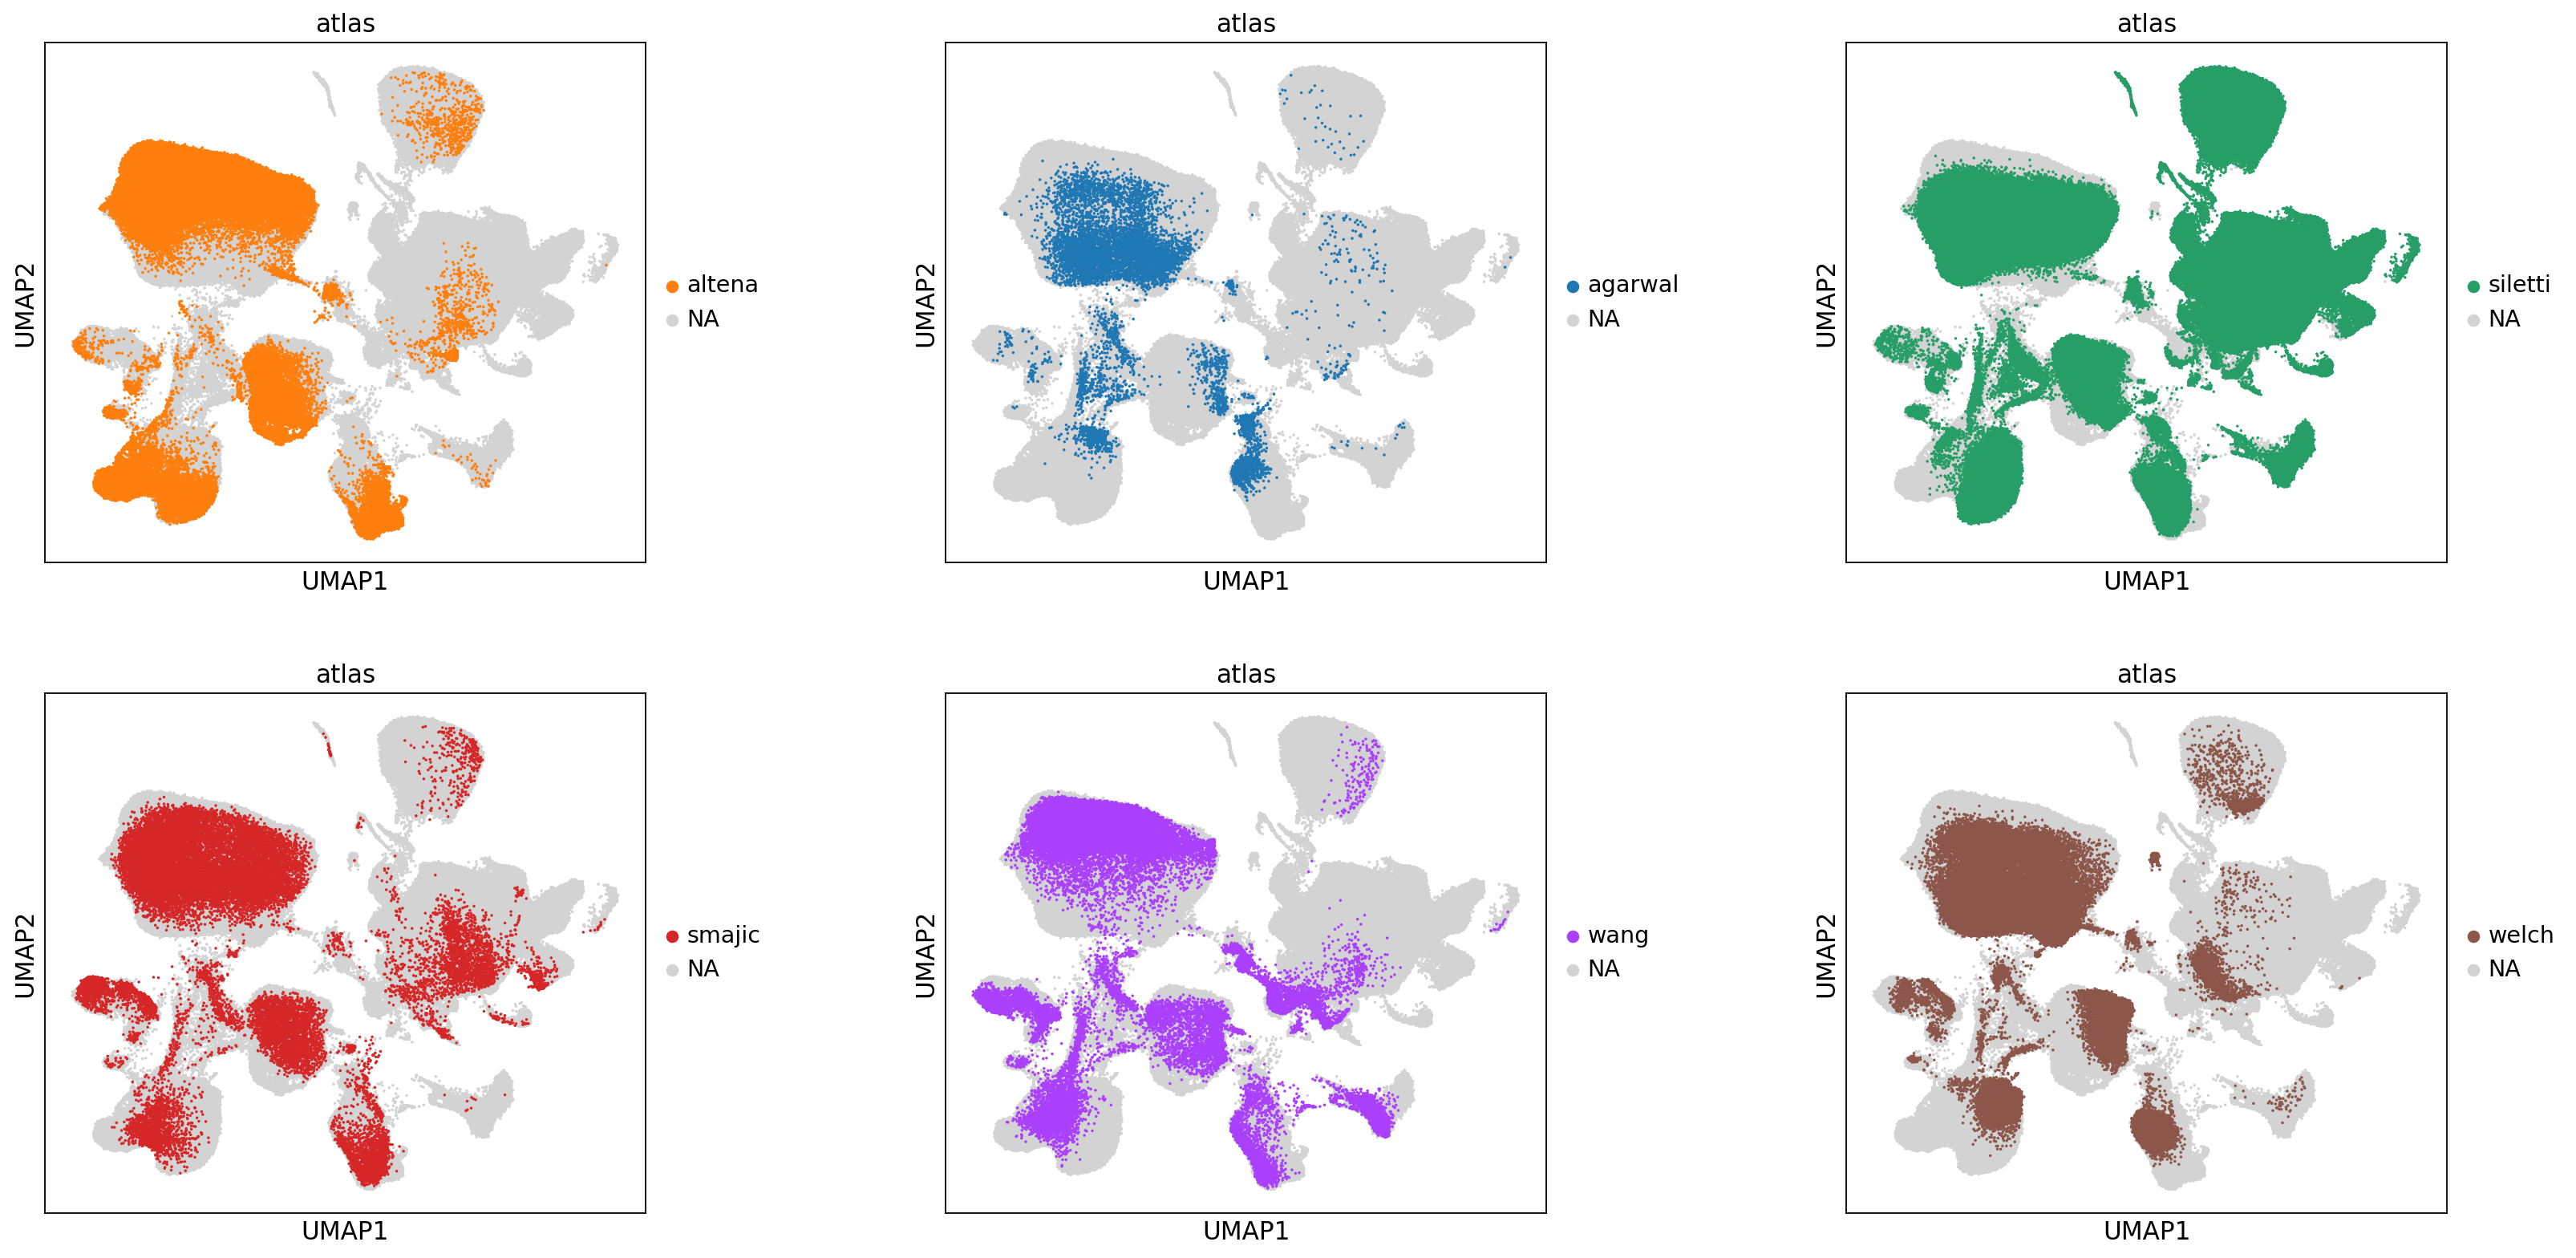

In [10]:
feature1='atlas'
title1='atlas'
fig, axs = plt.subplots(2, 3, figsize = [24,12])
#axs[-1, -1].axis('off')
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.5, hspace=0.25)
sc.pl.umap(adata_complete, color=feature1, groups= 'altena', use_raw=False, s=10, ax= axs[0,0],show=False, title=title1)
sc.pl.umap(adata_complete, color=feature1, groups= 'agarwal', use_raw=False, s=10, ax= axs[0,1],show=False, title=title1)
sc.pl.umap(adata_complete, color=feature1, groups= 'siletti', use_raw=False, s=10, ax= axs[0,2],show=False, title=title1)
sc.pl.umap(adata_complete, color=feature1, groups= 'smajic', use_raw=False, s=10, ax= axs[1,0],show=False, title=title1)
sc.pl.umap(adata_complete, color=feature1, groups= 'wang', use_raw=False, s=10, ax= axs[1,1],show=False, title=title1)
sc.pl.umap(adata_complete, color=feature1, groups= 'welch', use_raw=False, s=10, ax= axs[1,2],show=False, title=title1)
fig.savefig(f'/home/hers_basak/jjiang/jack/outputs/deliverables/5_integration/figures/adata_complete_scanorama_subplots.png',bbox_inches='tight')